In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import talib

import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
'''
Moving Average Convergence Divergence (MACD) is a momentum and trend-following technical indicator (or oscillator). 
It’s composed of 3 times series:

MACD line which is calculated by subtracting the 26-day exponential moving average (Slow EMA) from the 12-day EMA (Fast EMA) of 
an asset’s price (often close).
MACD Signal line which is calculated as the 9-day exponential moving average (EMA) of the MACD line.
MACD Histogram (Also called divergence), which is the difference between the MACD line and its Signal line
'''

def get_stock_data(ticker, start_date, end_date):
    df = yf.download(ticker, start = start_date, end = end_date)
    #stocks_prices.set_index('Date', inplace=True)
    df['ticker']=ticker

    return df

In [5]:
datetime_start = dt.datetime(2022, 1, 1, 7, 35, 51)
datetime_end=dt.datetime(2024, 1, 1, 7, 35, 51)

# Convert to timestamp:
timestamp_start=int(datetime_start.timestamp())
timestamp_end=int(datetime_end.timestamp())

tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS', 'ICICIBANK.NS']
stocks_prices = None

for ticker in tickers:
  current_stock_prices = get_stock_data(ticker, timestamp_start, timestamp_end)

  if stocks_prices is None:
    stocks_prices = current_stock_prices
  else:
    # Concatenate dataframes for subsequent iterations
    stocks_prices = pd.concat([stocks_prices, get_stock_data(ticker, timestamp_start,timestamp_end)])

# Sort the final dataframe by index
stocks_prices.sort_index(inplace=True)

print(stocks_prices)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-01-03  1091.447144  1111.268555  1090.777954  1109.376343  1098.149048   
2022-01-03  3750.000000  3830.000000  3745.000000  3817.750000  3657.206787   
2022-01-03   743.049988   766.000000   743.000000   764.700012   741.368225   
2022-01-03  1485.000000  1523.000000  1480.500000  1519.650024  1465.145264   
2022-01-03  1887.750000  1914.050049  1887.750000  1898.449951  1779.762451   
...                 ...          ...          ...          ...          ...   
2023-12-29  1541.050049  1559.449951  1540.000000  1542.900024  1516.980469   
2023-12-29  3792.000000  3822.600098  3765.399902  3793.399902  3739.513428   
2023-12-29  1305.550049  1307.000000  1289.650024  1292.474976  1288.103149   
2023-12-29  1697.000000  1714.900024  1696.000000  1709.250000  1686.223877   
2023-12-29  1004.049988  1008.549988   993.700012   

In [6]:
display(stocks_prices.head())
display(stocks_prices.tail())
stocks_prices.shape

,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
2022-01-03,1091.447144,1111.268555,1090.777954,1109.376343,1098.149048,5421611,RELIANCE.NS
2022-01-03,3750.000000,3830.000000,3745.000000,3817.750000,3657.206787,2346158,TCS.NS
2022-01-03,743.049988,766.000000,743.000000,764.700012,741.368225,9653095,ICICIBANK.NS
2022-01-03,1485.000000,1523.000000,1480.500000,1519.650024,1465.145264,4534592,HDFCBANK.NS
2022-01-03,1887.750000,1914.050049,1887.750000,1898.449951,1779.762451,3329616,INFY.NS


,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
2023-12-29,1541.050049,1559.449951,1540.000000,1542.900024,1516.980469,4388990,INFY.NS
2023-12-29,3792.000000,3822.600098,3765.399902,3793.399902,3739.513428,1574996,TCS.NS
2023-12-29,1305.550049,1307.000000,1289.650024,1292.474976,1288.103149,10864584,RELIANCE.NS
2023-12-29,1697.000000,1714.900024,1696.000000,1709.250000,1686.223877,12505713,HDFCBANK.NS
2023-12-29,1004.049988,1008.549988,993.700012,996.599976,988.093689,12280140,ICICIBANK.NS


(2465, 7)

In [7]:
'''
Market Values
To obtain market values for an index that tracks nifty, we will be using the same function used above with the ticker 
symbol of an exchange-traded fund (ETF) or a mutual fund that closely follows the nifty. 
'''

market_index_ticker = 'NIFTYBEES.NS'
market_prices = get_stock_data(market_index_ticker,timestamp_start,timestamp_end)

display(market_prices.head())
display(market_prices.tail())
market_prices.shape

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
2022-01-03,190.000000,190.949997,185.300003,190.720001,190.720001,2595035,NIFTYBEES.NS
2022-01-04,198.910004,198.910004,189.199997,192.460007,192.460007,1985741,NIFTYBEES.NS
2022-01-05,195.000000,195.000000,191.300003,193.339996,193.339996,1532485,NIFTYBEES.NS
2022-01-06,193.000000,193.000000,190.750000,191.919998,191.919998,2295715,NIFTYBEES.NS
2022-01-07,194.000000,194.000000,191.399994,192.419998,192.419998,1164892,NIFTYBEES.NS


,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
2023-12-22,235.990005,236.350006,232.009995,235.500000,235.500000,2920568,NIFTYBEES.NS
2023-12-26,236.990005,237.300003,234.880005,236.929993,236.929993,1774284,NIFTYBEES.NS
2023-12-27,239.699997,239.699997,236.179993,238.910004,238.910004,4385669,NIFTYBEES.NS
2023-12-28,240.000000,240.500000,238.880005,240.160004,240.160004,2495578,NIFTYBEES.NS
2023-12-29,247.350006,247.350006,238.000000,239.649994,239.649994,4342820,NIFTYBEES.NS


(493, 7)

In [8]:
#Active Strategy using MACD for buy and sell signals

def macd_using_talib(df):

    close_price=df['Adj Close']
    
    df['MACD_talib'], df['Signal_talib'], df['MACD_histogram_talib'] = talib.MACD(close_price, fastperiod=12, slowperiod=26, signalperiod=9)
    return df

def macd_usingpandas(df):
    close_price=df['Adj Close']

    #For the macd line
    fast_ema = close_price.ewm(span = 12, adjust=False).mean()
    slow_ema = close_price.ewm(span= 26, adjust=False).mean()
    macd_line_pandas = fast_ema - slow_ema

    #Compute MACD signal
    macdsignal_pandas = macd_line_pandas.ewm(span = 9, adjust = False).mean()

    macdhist_pandas= macd_line_pandas - macdsignal_pandas

    df['macd_line_pandas'] = macd_line_pandas.values
    df['macdsignal_pandas'] = macdsignal_pandas.values
    df['macdhist_pandas'] = macdhist_pandas.values

    return df

    

In [9]:
chosen_ticker = 'HDFCBANK.NS'
chosen_stock_prices = stocks_prices.loc[stocks_prices['ticker'] == chosen_ticker]
#chosen_stock_prices.head()


#Apply MACD implementations

chosen_stock_prices = macd_using_talib(chosen_stock_prices)
chosen_stock_prices = macd_usingpandas(chosen_stock_prices)

chosen_stock_prices = chosen_stock_prices.dropna()

chosen_stock_prices

/var/folders/gx/p5qhhh8s7rg2_ywh443qwth80000gn/T/ipykernel_20163/4147128317.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MACD_talib'], df['Signal_talib'], df['MACD_histogram_talib'] = talib.MACD(close_price, fastperiod=12, slowperiod=26, signalperiod=9)
/var/folders/gx/p5qhhh8s7rg2_ywh443qwth80000gn/T/ipykernel_20163/4147128317.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MACD_talib'], df['Signal_talib'], df['MACD_histogram_talib'] = talib.MACD(close_price, fastperiod=12, slowperiod=26

,Open,High,Low,Close,Adj Close,Volume,ticker,MACD_talib,Signal_talib,MACD_histogram_talib,macd_line_pandas,macdsignal_pandas,macdhist_pandas
Date,,,,,,,,,,,,,
2022-02-18,1498.300049,1517.000000,1490.449951,1512.349976,1458.107056,3898064,HDFCBANK.NS,-8.296946,-14.892018,6.595072,-2.214540,-4.786719,2.572179
2022-02-21,1504.000000,1530.699951,1495.550049,1522.099976,1467.507446,3734033,HDFCBANK.NS,-6.353736,-13.184361,6.830626,-0.791345,-3.987644,3.196299
2022-02-22,1489.800049,1522.099976,1487.949951,1510.699951,1456.516235,4768098,HDFCBANK.NS,-5.635663,-11.674622,6.038959,-0.544080,-3.298931,2.754852
2022-02-23,1525.099976,1525.699951,1495.650024,1500.900024,1447.067871,4514781,HDFCBANK.NS,-5.762561,-10.492209,4.729648,-1.097869,-2.858719,1.760850
2022-02-24,1449.900024,1474.949951,1407.150024,1419.400024,1368.490845,11815383,HDFCBANK.NS,-12.064566,-10.806681,-1.257885,-7.787491,-3.844473,-3.943017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,1683.599976,1685.900024,1667.099976,1670.849976,1648.341187,24289425,HDFCBANK.NS,36.094181,33.830939,2.263242,36.094181,33.830939,2.263242
2023-12-26,1673.250000,1685.949951,1668.550049,1682.449951,1659.784912,9022928,HDFCBANK.NS,36.230728,34.310897,1.919831,36.230728,34.310897,1.919831
2023-12-27,1681.500000,1706.500000,1678.599976,1703.300049,1680.354126,13504539,HDFCBANK.NS,37.565672,34.961852,2.603820,37.565672,34.961852,2.603820


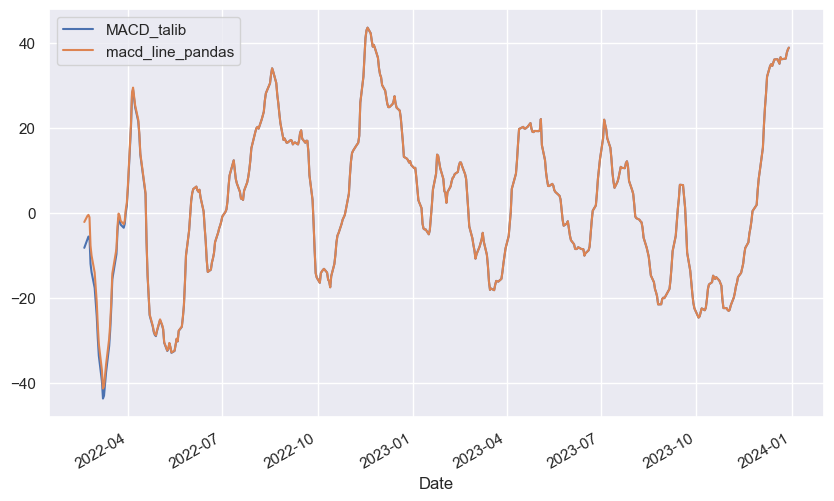

In [10]:
chosen_stock_prices[['MACD_talib','macd_line_pandas']].plot(figsize=(10,6))
plt.show()

In [11]:
def plot_signals(df, ticker):

    %matplotlib inline
    import matplotlib.pyplot as plt
    import matplotlib.lines as mlines

    required_columns = ['Adj Close', 'macd_line_pandas', 'macdsignal_pandas', 'macdhist_pandas']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Column '{col}' not found in the dataframe.")

    #df['macd_line_pandas'].shift(1) <= df['macdsignal_pandas'] - this is to check if previosuly the macd line was below signal line so its
    # actually a crossover
    buy_signals = (df['macd_line_pandas'] > df['macdsignal_pandas']) & (df['macd_line_pandas'].shift(1) <= df['macdsignal_pandas'].shift(1))
    sell_signals = (df['macd_line_pandas'] < df['macdsignal_pandas']) & (df['macd_line_pandas'].shift(1) >= df['macdsignal_pandas'].shift(1))

    # Centerline crossovers
    bullish_crossovers = (df['macd_line_pandas'] > 0) & (df['macd_line_pandas'].shift(1) <= 0)
    bearish_crossovers = (df['macd_line_pandas'] < 0) & (df['macd_line_pandas'].shift(1) >= 0)

    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(12, 15), sharex=True)

    df[['Adj Close']].plot(ax= ax0, label = 'adj_close')
    df['fast_ema']= df['Adj Close'].ewm(span=12).mean()
    df['slow_ema']= df['Adj Close'].ewm(span=26).mean()
    df[['fast_ema','slow_ema']].plot(ax=ax0, linestyle='--')

    ax0.set_title(f"{ticker} - Adjusted Close Price with Fast and Slow EMA")
    ax0.set_ylabel("Price ($)")
    ax0.legend()

    # this is to plot macd indicators
    df['macd_line_pandas'].plot(ax=ax1, label='MACD Line', color='orange')
    df['macdsignal_pandas'].plot(ax=ax1, label='Signal Line', linestyle='--', color='blue')
    ax1.bar(df.index, df['macdhist_pandas'], label='Histogram', color='gray', alpha=0.5)
    
    # now plot the buy and sell signals
    ax1.scatter(df.index[buy_signals], df['macd_line_pandas'][buy_signals], color='green', label='Buy Signal', zorder=5)
    ax1.scatter(df.index[sell_signals], df['macd_line_pandas'][sell_signals], color='red', label='Sell Signal', zorder=5)
    ax1.axhline(0, color='black', linestyle='--', linewidth=1)
    ax1.set_title(f"{ticker} - MACD Indicators with Buy and Sell Signals")
    ax1.legend()

    df['macd_line_pandas'].plot(ax=ax2, label='MACD Line', color='orange')
    df['macdsignal_pandas'].plot(ax=ax2, label='Signal Line', linestyle='--', color='blue')
    ax2.bar(df.index, df['macdhist_pandas'], label='Histogram', color='gray', alpha=0.5)

    ax2.scatter(df.index[bullish_crossovers], df['macd_line_pandas'][bullish_crossovers], color='black', label='Bullish Crossover', zorder=5)
    ax2.scatter(df.index[bearish_crossovers], df['macd_line_pandas'][bearish_crossovers], color='gray', label='Bearish Crossover', zorder=5)
    ax2.axhline(0, color='black', linestyle='--', linewidth=1)
    ax2.set_title(f"{ticker} - MACD with Centerline Crossovers")
    ax2.legend()

    plt.tight_layout()
    plt.show()

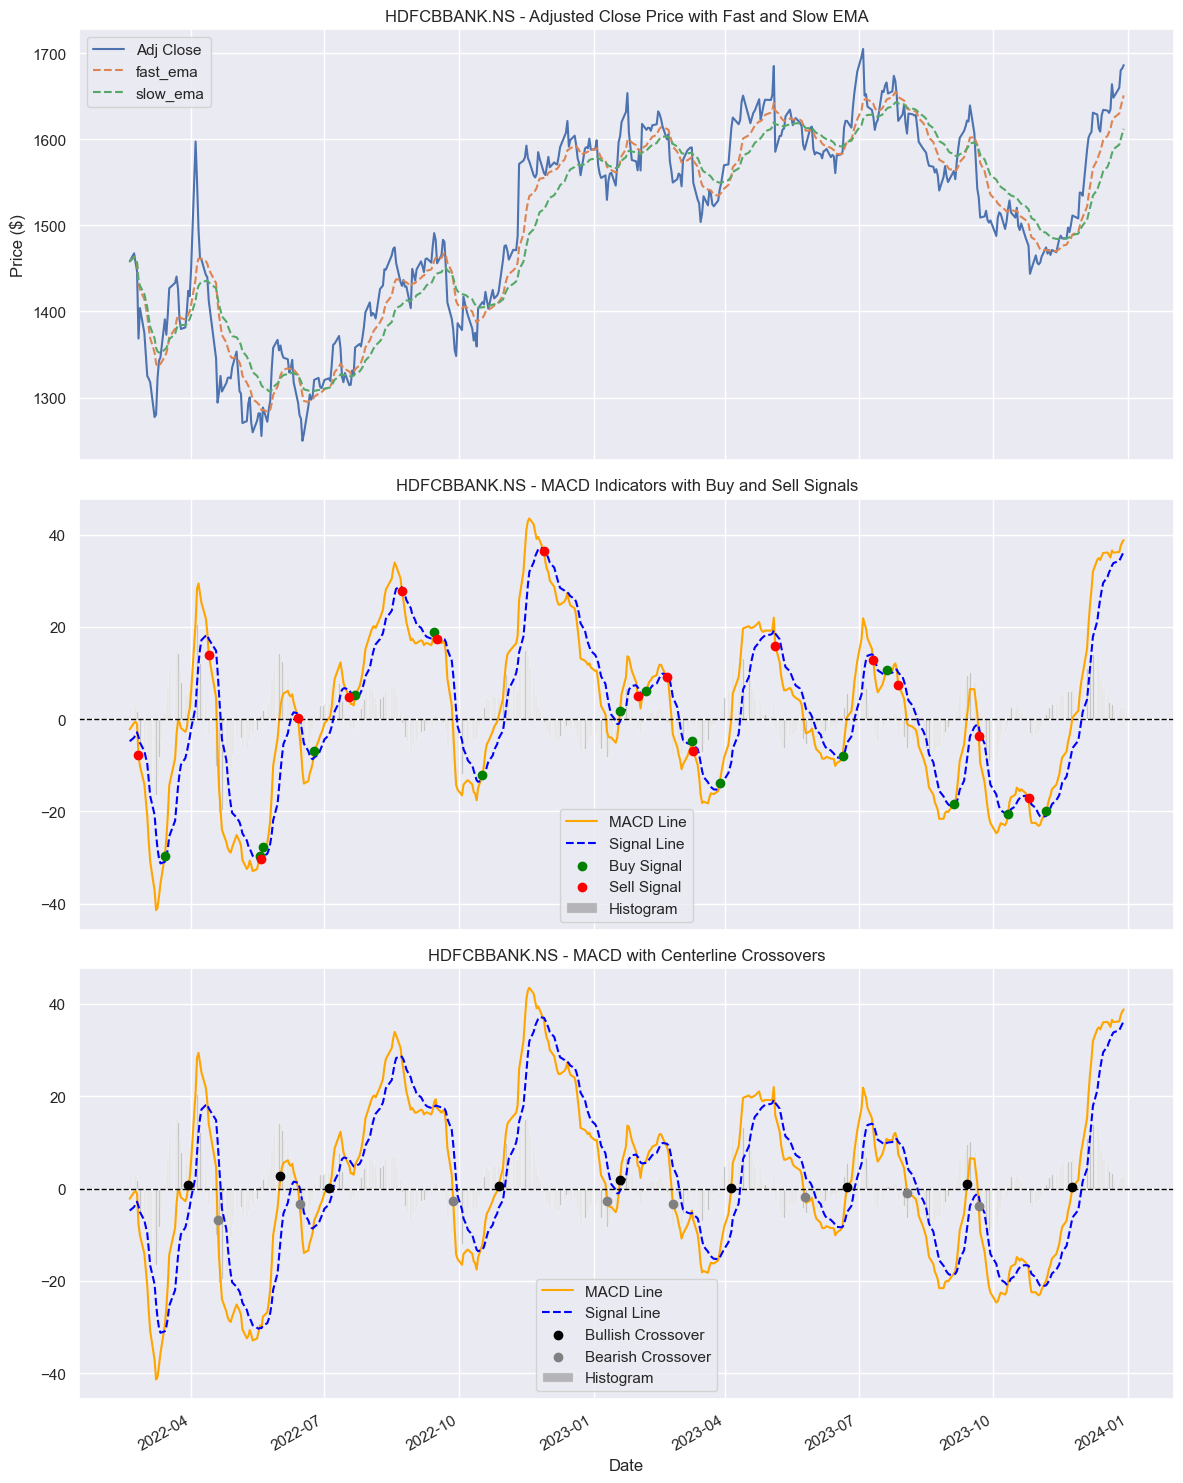

In [12]:
plot_signals(chosen_stock_prices, "HDFCBBANK.NS")

In [13]:
df_hdfc=chosen_stock_prices.copy()

In [14]:
df_hdfc['signal'] = np.where((df_hdfc['macd_line_pandas'] > df_hdfc['macdsignal_pandas']) & (df_hdfc['macd_line_pandas'].shift(1) <= df_hdfc['macdsignal_pandas'].shift(1)),1,0)
df_hdfc['signal'] = np.where((df_hdfc['macd_line_pandas'] < df_hdfc['macdsignal_pandas']) & (df_hdfc['macd_line_pandas'].shift(1) >= df_hdfc['macdsignal_pandas'].shift(1)),-1,df_hdfc['signal'])

In [15]:
df_hdfc

,Open,High,Low,Close,Adj Close,Volume,ticker,MACD_talib,Signal_talib,MACD_histogram_talib,macd_line_pandas,macdsignal_pandas,macdhist_pandas,fast_ema,slow_ema,signal
Date,,,,,,,,,,,,,,,,
2022-02-18,1498.300049,1517.000000,1490.449951,1512.349976,1458.107056,3898064,HDFCBANK.NS,-8.296946,-14.892018,6.595072,-2.214540,-4.786719,2.572179,1458.107056,1458.107056,0
2022-02-21,1504.000000,1530.699951,1495.550049,1522.099976,1467.507446,3734033,HDFCBANK.NS,-6.353736,-13.184361,6.830626,-0.791345,-3.987644,3.196299,1463.198934,1462.988028,0
2022-02-22,1489.800049,1522.099976,1487.949951,1510.699951,1456.516235,4768098,HDFCBANK.NS,-5.635663,-11.674622,6.038959,-0.544080,-3.298931,2.754852,1460.590675,1460.662776,0
2022-02-23,1525.099976,1525.699951,1495.650024,1500.900024,1447.067871,4514781,HDFCBANK.NS,-5.762561,-10.492209,4.729648,-1.097869,-2.858719,1.760850,1456.322054,1456.862234,0
2022-02-24,1449.900024,1474.949951,1407.150024,1419.400024,1368.490845,11815383,HDFCBANK.NS,-12.064566,-10.806681,-1.257885,-7.787491,-3.844473,-3.943017,1432.458629,1436.368545,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,1683.599976,1685.900024,1667.099976,1670.849976,1648.341187,24289425,HDFCBANK.NS,36.094181,33.830939,2.263242,36.094181,33.830939,2.263242,1624.557182,1588.463001,0
2023-12-26,1673.250000,1685.949951,1668.550049,1682.449951,1659.784912,9022928,HDFCBANK.NS,36.230728,34.310897,1.919831,36.230728,34.310897,1.919831,1629.976833,1593.746105,0
2023-12-27,1681.500000,1706.500000,1678.599976,1703.300049,1680.354126,13504539,HDFCBANK.NS,37.565672,34.961852,2.603820,37.565672,34.961852,2.603820,1637.727186,1600.161514,0


In [16]:
def macd_strategy(df, initial_cash, cash, position, portfolio_value, trade_history):
    for i in range(1, len(df)):
        signal = df['signal'].iloc[i]
        price = df['Close'].iloc[i]

        if signal == 1 and position == 0:
            position = cash // price
            cash -= position * price
            trade_history.append(('BUY', df.index[i], price, position))

        elif signal == -1 and position > 0:
            cash += position * price
            trade_history.append(('SELL', df.index[i], price, position))
            position = 0

        # Update portfolio value after each trade decision
        portfolio_value = cash + position * price

        # Log the portfolio value at each step for debugging
        print(f"Date: {df.index[i]}, Cash: {cash}, Position: {position}, Portfolio Value: {portfolio_value}")

    # Update DataFrame columns with final portfolio values and cumulative returns
    df['Portfolio_Value'] = cash + (position * df['Close'])
    df['Cumulative_Returns'] = (1 + df['Portfolio_Value'].pct_change()).cumprod()

    # Returning the updated DataFrame and key values for further use or inspection
    return df, cash, position, portfolio_value, trade_history


In [17]:
#Function for a trading strategy
initial_cash = 10000
cash = initial_cash
position=0
portfolio_value=cash

trade_history=[]

df_hdfc2 = macd_strategy(df_hdfc,initial_cash, cash, position, portfolio_value, trade_history)

Date: 2022-02-21 00:00:00, Cash: 10000, Position: 0, Portfolio Value: 10000.0
Date: 2022-02-22 00:00:00, Cash: 10000, Position: 0, Portfolio Value: 10000.0
Date: 2022-02-23 00:00:00, Cash: 10000, Position: 0, Portfolio Value: 10000.0
Date: 2022-02-24 00:00:00, Cash: 10000, Position: 0, Portfolio Value: 10000.0
Date: 2022-02-25 00:00:00, Cash: 10000, Position: 0, Portfolio Value: 10000.0
Date: 2022-02-28 00:00:00, Cash: 10000, Position: 0, Portfolio Value: 10000.0
Date: 2022-03-02 00:00:00, Cash: 10000, Position: 0, Portfolio Value: 10000.0
Date: 2022-03-03 00:00:00, Cash: 10000, Position: 0, Portfolio Value: 10000.0
Date: 2022-03-04 00:00:00, Cash: 10000, Position: 0, Portfolio Value: 10000.0
Date: 2022-03-07 00:00:00, Cash: 10000, Position: 0, Portfolio Value: 10000.0
Date: 2022-03-08 00:00:00, Cash: 10000, Position: 0, Portfolio Value: 10000.0
Date: 2022-03-09 00:00:00, Cash: 10000, Position: 0, Portfolio Value: 10000.0
Date: 2022-03-10 00:00:00, Cash: 10000, Position: 0, Portfolio V

In [18]:
trade_history

[('BUY', Timestamp('2022-03-14 00:00:00'), 1442.550048828125, 6.0),
 ('SELL', Timestamp('2022-04-13 00:00:00'), 1464.949951171875, 6.0),
 ('BUY', Timestamp('2022-05-18 00:00:00'), 1313.9000244140625, 7.0),
 ('SELL', Timestamp('2022-05-19 00:00:00'), 1287.050048828125, 7.0),
 ('BUY', Timestamp('2022-05-20 00:00:00'), 1320.949951171875, 7.0),
 ('SELL', Timestamp('2022-06-13 00:00:00'), 1326.5999755859375, 7.0),
 ('BUY', Timestamp('2022-06-24 00:00:00'), 1353.800048828125, 7.0),
 ('SELL', Timestamp('2022-07-18 00:00:00'), 1347.550048828125, 7.0),
 ('BUY', Timestamp('2022-07-22 00:00:00'), 1392.5, 7.0),
 ('SELL', Timestamp('2022-08-23 00:00:00'), 1465.800048828125, 7.0),
 ('BUY', Timestamp('2022-09-14 00:00:00'), 1528.6500244140625, 6.0),
 ('SELL', Timestamp('2022-09-16 00:00:00'), 1492.75, 6.0),
 ('BUY', Timestamp('2022-10-17 00:00:00'), 1446.550048828125, 7.0),
 ('SELL', Timestamp('2022-11-28 00:00:00'), 1600.25, 7.0),
 ('BUY', Timestamp('2023-01-19 00:00:00'), 1644.0999755859375, 6.0),


In [19]:
df_hdfc2

(                   Open         High          Low        Close    Adj Close  \
 Date                                                                          
 2022-02-18  1498.300049  1517.000000  1490.449951  1512.349976  1458.107056   
 2022-02-21  1504.000000  1530.699951  1495.550049  1522.099976  1467.507446   
 2022-02-22  1489.800049  1522.099976  1487.949951  1510.699951  1456.516235   
 2022-02-23  1525.099976  1525.699951  1495.650024  1500.900024  1447.067871   
 2022-02-24  1449.900024  1474.949951  1407.150024  1419.400024  1368.490845   
 ...                 ...          ...          ...          ...          ...   
 2023-12-22  1683.599976  1685.900024  1667.099976  1670.849976  1648.341187   
 2023-12-26  1673.250000  1685.949951  1668.550049  1682.449951  1659.784912   
 2023-12-27  1681.500000  1706.500000  1678.599976  1703.300049  1680.354126   
 2023-12-28  1709.300049  1721.400024  1702.000000  1705.250000  1682.277710   
 2023-12-29  1697.000000  1714.900024  1

In [20]:
df_hdfc2[0].tail()

,Open,High,Low,Close,Adj Close,Volume,ticker,MACD_talib,Signal_talib,MACD_histogram_talib,macd_line_pandas,macdsignal_pandas,macdhist_pandas,fast_ema,slow_ema,signal,Portfolio_Value,Cumulative_Returns
Date,,,,,,,,,,,,,,,,,,
2023-12-22,1683.599976,1685.900024,1667.099976,1670.849976,1648.341187,24289425,HDFCBANK.NS,36.094181,33.830939,2.263242,36.094181,33.830939,2.263242,1624.557182,1588.463001,0,11743.700195,1.104333
2023-12-26,1673.250000,1685.949951,1668.550049,1682.449951,1659.784912,9022928,HDFCBANK.NS,36.230728,34.310897,1.919831,36.230728,34.310897,1.919831,1629.976833,1593.746105,0,11824.900024,1.111969
2023-12-27,1681.500000,1706.500000,1678.599976,1703.300049,1680.354126,13504539,HDFCBANK.NS,37.565672,34.961852,2.603820,37.565672,34.961852,2.603820,1637.727186,1600.161514,0,11970.850708,1.125694
2023-12-28,1709.300049,1721.400024,1702.000000,1705.250000,1682.277710,22038235,HDFCBANK.NS,38.336917,35.636865,2.700052,38.336917,35.636865,2.700052,1644.581112,1606.244195,0,11984.500366,1.126977
2023-12-29,1697.000000,1714.900024,1696.000000,1709.250000,1686.223877,12505713,HDFCBANK.NS,38.819075,36.273307,2.545768,38.819075,36.273307,2.545768,1650.987692,1612.168616,0,12012.500366,1.129610


In [21]:
final_hdfc=df_hdfc2[0].tail()
final_hdfc

,Open,High,Low,Close,Adj Close,Volume,ticker,MACD_talib,Signal_talib,MACD_histogram_talib,macd_line_pandas,macdsignal_pandas,macdhist_pandas,fast_ema,slow_ema,signal,Portfolio_Value,Cumulative_Returns
Date,,,,,,,,,,,,,,,,,,
2023-12-22,1683.599976,1685.900024,1667.099976,1670.849976,1648.341187,24289425,HDFCBANK.NS,36.094181,33.830939,2.263242,36.094181,33.830939,2.263242,1624.557182,1588.463001,0,11743.700195,1.104333
2023-12-26,1673.250000,1685.949951,1668.550049,1682.449951,1659.784912,9022928,HDFCBANK.NS,36.230728,34.310897,1.919831,36.230728,34.310897,1.919831,1629.976833,1593.746105,0,11824.900024,1.111969
2023-12-27,1681.500000,1706.500000,1678.599976,1703.300049,1680.354126,13504539,HDFCBANK.NS,37.565672,34.961852,2.603820,37.565672,34.961852,2.603820,1637.727186,1600.161514,0,11970.850708,1.125694
2023-12-28,1709.300049,1721.400024,1702.000000,1705.250000,1682.277710,22038235,HDFCBANK.NS,38.336917,35.636865,2.700052,38.336917,35.636865,2.700052,1644.581112,1606.244195,0,11984.500366,1.126977
2023-12-29,1697.000000,1714.900024,1696.000000,1709.250000,1686.223877,12505713,HDFCBANK.NS,38.819075,36.273307,2.545768,38.819075,36.273307,2.545768,1650.987692,1612.168616,0,12012.500366,1.129610


In [22]:
final_returns = final_hdfc.iloc[-1][16]

initial= 10000

total_returns= (final_returns - initial)/ initial
total_returns_perc=total_returns*100
total_returns_perc

/var/folders/gx/p5qhhh8s7rg2_ywh443qwth80000gn/T/ipykernel_20163/1039692940.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  final_returns = final_hdfc.iloc[-1][16]


20.125003662109375

In [27]:
#Drawdown - measure of a investment or trading account's decline from peak before it recovers back up (or) just the decline from a peak
# to a trough

#Max drawdown is the measure of the maximum loss

hdfc = df_hdfc2[0]
hdfc

,Open,High,Low,Close,Adj Close,Volume,ticker,MACD_talib,Signal_talib,MACD_histogram_talib,macd_line_pandas,macdsignal_pandas,macdhist_pandas,fast_ema,slow_ema,signal,Portfolio_Value,Cumulative_Returns
Date,,,,,,,,,,,,,,,,,,
2022-02-18,1498.300049,1517.000000,1490.449951,1512.349976,1458.107056,3898064,HDFCBANK.NS,-8.296946,-14.892018,6.595072,-2.214540,-4.786719,2.572179,1458.107056,1458.107056,0,10634.200195,NaN
2022-02-21,1504.000000,1530.699951,1495.550049,1522.099976,1467.507446,3734033,HDFCBANK.NS,-6.353736,-13.184361,6.830626,-0.791345,-3.987644,3.196299,1463.198934,1462.988028,0,10702.450195,1.006418
2022-02-22,1489.800049,1522.099976,1487.949951,1510.699951,1456.516235,4768098,HDFCBANK.NS,-5.635663,-11.674622,6.038959,-0.544080,-3.298931,2.754852,1460.590675,1460.662776,0,10622.650024,0.998914
2022-02-23,1525.099976,1525.699951,1495.650024,1500.900024,1447.067871,4514781,HDFCBANK.NS,-5.762561,-10.492209,4.729648,-1.097869,-2.858719,1.760850,1456.322054,1456.862234,0,10554.050537,0.992463
2022-02-24,1449.900024,1474.949951,1407.150024,1419.400024,1368.490845,11815383,HDFCBANK.NS,-12.064566,-10.806681,-1.257885,-7.787491,-3.844473,-3.943017,1432.458629,1436.368545,-1,9983.550537,0.938815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,1683.599976,1685.900024,1667.099976,1670.849976,1648.341187,24289425,HDFCBANK.NS,36.094181,33.830939,2.263242,36.094181,33.830939,2.263242,1624.557182,1588.463001,0,11743.700195,1.104333
2023-12-26,1673.250000,1685.949951,1668.550049,1682.449951,1659.784912,9022928,HDFCBANK.NS,36.230728,34.310897,1.919831,36.230728,34.310897,1.919831,1629.976833,1593.746105,0,11824.900024,1.111969
2023-12-27,1681.500000,1706.500000,1678.599976,1703.300049,1680.354126,13504539,HDFCBANK.NS,37.565672,34.961852,2.603820,37.565672,34.961852,2.603820,1637.727186,1600.161514,0,11970.850708,1.125694


In [28]:
hdfc['Portfolio_Value'].max()

12145.150024414062

In [29]:
rolling_max = np.maximum.accumulate(hdfc['Portfolio_Value'])
rolling_max

Date
2022-02-18    10634.200195
2022-02-21    10702.450195
2022-02-22    10702.450195
2022-02-23    10702.450195
2022-02-24    10702.450195
                  ...     
2023-12-22    12145.150024
2023-12-26    12145.150024
2023-12-27    12145.150024
2023-12-28    12145.150024
2023-12-29    12145.150024
Name: Portfolio_Value, Length: 460, dtype: float64

In [30]:
daily_drawdown = (hdfc['Portfolio_Value']-rolling_max)/rolling_max
daily_drawdown

Date
2022-02-18    0.000000
2022-02-21    0.000000
2022-02-22   -0.007456
2022-02-23   -0.013866
2022-02-24   -0.067172
                ...   
2023-12-22   -0.033054
2023-12-26   -0.026369
2023-12-27   -0.014351
2023-12-28   -0.013227
2023-12-29   -0.010922
Name: Portfolio_Value, Length: 460, dtype: float64

In [31]:
max_drawdown = daily_drawdown.min()
max_drawdown

-0.22571239509279334

In [32]:
#Sharpe ratio - Divides a portflios excess returns by a measure of its volatility(standard deviation) to asses if risk-adjusted performace
# excess returns are greater than a benchmark's returns

#SR = (Portfolio return - risk free rate(around 5%))/standard deviation of portfolio excess return

rfr=0.05

portfolio_changes = np.diff(hdfc['Portfolio_Value'])

start_portfolio_values = hdfc['Portfolio_Value'][:-1]

daily_returns = portfolio_changes / start_portfolio_values

daily_rfr = rfr / 252

scaling_factor = np.sqrt(252)
excess_return = daily_returns - daily_rfr

avg_excess_return = np.mean(excess_return)

portfolio_volatility = np.std(excess_return)

sharpe_ratio = (scaling_factor * avg_excess_return) / portfolio_volatility

sharpe_ratio




0.18572806690532254

In [33]:
market_prices['Close']

Date
2022-01-03    190.720001
2022-01-04    192.460007
2022-01-05    193.339996
2022-01-06    191.919998
2022-01-07    192.419998
                 ...    
2023-12-22    235.500000
2023-12-26    236.929993
2023-12-27    238.910004
2023-12-28    240.160004
2023-12-29    239.649994
Name: Close, Length: 493, dtype: float64

In [42]:
#BETA to the market - Measure of risk as compared to the market as a whole

#BETA = Covariance(Re,Rm) / Variance(Rm)

portfolio_returns = np.diff(hdfc['Portfolio_Value']),hdfc['Portfolio_Value'][:-1]

market_returns = np.diff(market_prices['Close']),market_prices['Close'][:-1]

covariance = np.cov(portfolio_returns,market_returns)[0][1]

market_var = np.var(market_returns)

beta = covariance/market_var
beta

-0.8905811972252166

In [35]:
hdfc['Portfolio_Value']

Date
2022-02-18    10634.200195
2022-02-21    10702.450195
2022-02-22    10622.650024
2022-02-23    10554.050537
2022-02-24     9983.550537
                  ...     
2023-12-22    11743.700195
2023-12-26    11824.900024
2023-12-27    11970.850708
2023-12-28    11984.500366
2023-12-29    12012.500366
Name: Portfolio_Value, Length: 460, dtype: float64

In [36]:
market_prices.index[0:3]

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05'], dtype='datetime64[ns]', name='Date', freq=None)

In [37]:
market_prices = market_prices.drop(market_prices.index[0:33])

In [38]:
market_prices

,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
2022-02-18,183.300003,190.000000,183.300003,186.639999,186.639999,1659566,NIFTYBEES.NS
2022-02-21,190.000000,190.000000,184.690002,186.289993,186.289993,2084966,NIFTYBEES.NS
2022-02-22,186.000000,186.000000,182.690002,185.270004,185.270004,4189474,NIFTYBEES.NS
2022-02-23,187.990005,187.990005,184.580002,185.050003,185.050003,1460494,NIFTYBEES.NS
2022-02-24,180.600006,189.949997,177.000000,178.360001,178.360001,19565577,NIFTYBEES.NS
...,...,...,...,...,...,...,...
2023-12-22,235.990005,236.350006,232.009995,235.500000,235.500000,2920568,NIFTYBEES.NS
2023-12-26,236.990005,237.300003,234.880005,236.929993,236.929993,1774284,NIFTYBEES.NS
2023-12-27,239.699997,239.699997,236.179993,238.910004,238.910004,4385669,NIFTYBEES.NS


In [43]:
#BETA to the market - Measure of risk as compared to the market as a whole

#BETA = Covariance(Re,Rm) / Variance(Rm)

portfolio_returns = np.diff(hdfc['Portfolio_Value']),hdfc['Portfolio_Value'][:-1]

market_returns = np.diff(market_prices['Close']),market_prices['Close'][:-1]

covariance = np.cov(portfolio_returns,market_returns)[0][1]

market_var = np.var(market_returns)

beta = covariance/market_var
beta
#Negative beta meaning itll move opposite to the market

-0.8905811972252166

In [44]:
hdfc['Portfolio_Value'][-1]

/var/folders/gx/p5qhhh8s7rg2_ywh443qwth80000gn/T/ipykernel_20163/4122584179.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hdfc['Portfolio_Value'][-1]


12012.500366210938

In [48]:
#Alpha is a measure to show excess return on an investment compared to benchmark returns
#expected_return = rfr + beta(expected_market_return - rfr)
'''
ALPHA = R(p) - [R(f) + (R(m) - R(f)*BETA] = R(p) - expected_return 
where, 

Rp = realized return of the portfolio
Rf = risk free return 
Rm = market return 
'''

portfolio_return = (hdfc['Portfolio_Value'][-1] - hdfc['Portfolio_Value'][0])/hdfc['Portfolio_Value'][0]

market_return = (market_prices['Close'][-1] - market_prices['Close'][0])/market_prices['Close'][0]

rfr=0.05
expected_return = rfr + beta*(market_return - rfr)

alpha = portfolio_return - expected_return 
alpha

/var/folders/gx/p5qhhh8s7rg2_ywh443qwth80000gn/T/ipykernel_20163/1973851927.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  portfolio_return = (hdfc['Portfolio_Value'][-1] - hdfc['Portfolio_Value'][0])/hdfc['Portfolio_Value'][0]
/var/folders/gx/p5qhhh8s7rg2_ywh443qwth80000gn/T/ipykernel_20163/1973851927.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_return = (market_prices['Close'][-1] - market_prices['Close'][0])/market_prices['Close'][0]


0.28802634608307

In [46]:
market_prices['Close'][-1]

/var/folders/gx/p5qhhh8s7rg2_ywh443qwth80000gn/T/ipykernel_20163/2072891133.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_prices['Close'][-1]


239.64999389648438